In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafilename = "data_processed-without-outliers.csv"
d = pd.read_csv(datafilename)
print("Loading", len(d), "lines of data (outliers removed).")

resultsfilename = "data_stats-without-outliers.csv"
st = pd.read_csv(resultsfilename)
print("Loading", len(st), "lines of stats.")

Loading 13608 lines of data (outliers removed).
Loading 756 lines of stats.


In [3]:
# comparison by design expertise

types = ["lexical", "recognition"]
fonts = ["arial", "sansforgetica"]
skills = ["Designer", "Non-designer"]
metrics = ["RT", "RT_word", "RT_nonword", "AUC", "AUC_word", "AUC_nonword"]
RTs = metrics[:3]
AUCs = metrics[3:]

cols = pd.MultiIndex.from_product([skills, metrics, ["mean", "SEM"]], names=["skill", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types, fonts], names=["sid", "type", "font"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t, font in res.index:
    for skill in skills:
        if skill == "Designer":
            r = st[st["isDesigner"] & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        else:
            r = st[(st["isDesigner"] == False) & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t, font), (skill, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t, font), (skill, metric, "SEM")] = r[metric].sem()
display(res)
res.to_csv("results/means-by-design-expertise.csv")

skill                         Designer                                        \
metric                              RT           RT_word          RT_nonword   
stat                              mean      SEM     mean      SEM       mean   
sid type        font                                                           
1   lexical     arial          3354.75   924.58  1688.68  51.4365    5020.81   
                sansforgetica  2668.26  93.3487  1918.84  99.8268    3417.67   
    recognition arial          2363.85  85.0099  2212.63  78.3662    2515.07   
                sansforgetica  2473.41  85.7885   2351.7   98.513    2595.12   
2   lexical     arial          2466.57  105.491  1838.25  108.499    3094.88   
                sansforgetica  2958.79  99.3345  2055.23  86.5626    3862.35   
    recognition arial          2556.92    96.36   2399.6  95.3813    2714.24   
                sansforgetica  24087.1  21462.2  2335.87  81.2123    45838.3   

skill                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial          1841.75  0.969896  0.00705615       NaN   
                sansforgetica  152.276  0.979375  0.00552361       NaN   
    recognition arial          132.127  0.901693   0.0153663  0.889323   
                sansforgetica   99.147  0.891113   0.0173565  0.869141   
2   lexical     arial          166.102  0.953396   0.0106772       NaN   
                sansforgetica  141.637  0.936321   0.0155966       NaN   
    recognition arial          129.258  0.848467   0.0168252  0.851415   
                sansforgetica  42929.1   0.85967   0.0177097  0.876769   

skill                                       ...     Non-designer           \
metric                                      ...          RT_word            
stat                                 SEM    ...             mean      SEM   
sid type        font                        ...                             
1   lexical     arial                NaN    ...          1921.91   60.533   
                sansforgetica        NaN    ...           2044.6  87.5181   
    recognition arial          0.0171557    ...          2478.95  100.518   
                sansforgetica  0.0221881    ...          2505.15  95.3008   
2   lexical     arial                NaN    ...          1865.54  93.3521   
                sansforgetica        NaN    ...          2037.77  75.6347   
    recognition arial          0.0221756    ...          2361.59  68.9552   
                sansforgetica  0.0188129    ...          2597.14  86.6945   

skill                                                                    \
metric                        RT_nonword                AUC               
stat                                mean      SEM      mean         SEM   
sid type        font                                                      
1   lexical     arial            3042.32  148.647  0.972838   0.0079046   
                sansforgetica    3636.71  167.377  0.975676  0.00900901   
    recognition arial            2546.58  109.818   0.90815   0.0129588   
                sansforgetica    2888.76  105.117  0.905194    0.013817   
2   lexical     arial            3041.85  145.548  0.970196  0.00861253   
                sansforgetica    3798.99  159.361  0.978137  0.00613086   
    recognition arial            2666.63  110.353  0.906403   0.0146877   
                sansforgetica    2860.66  105.718  0.870711   0.0164755   

skill                                                                      
metric                         AUC_word            AUC_nonword             
stat                               mean        SEM        mean        SEM  
sid type        font                                                       
1   lexical     aria

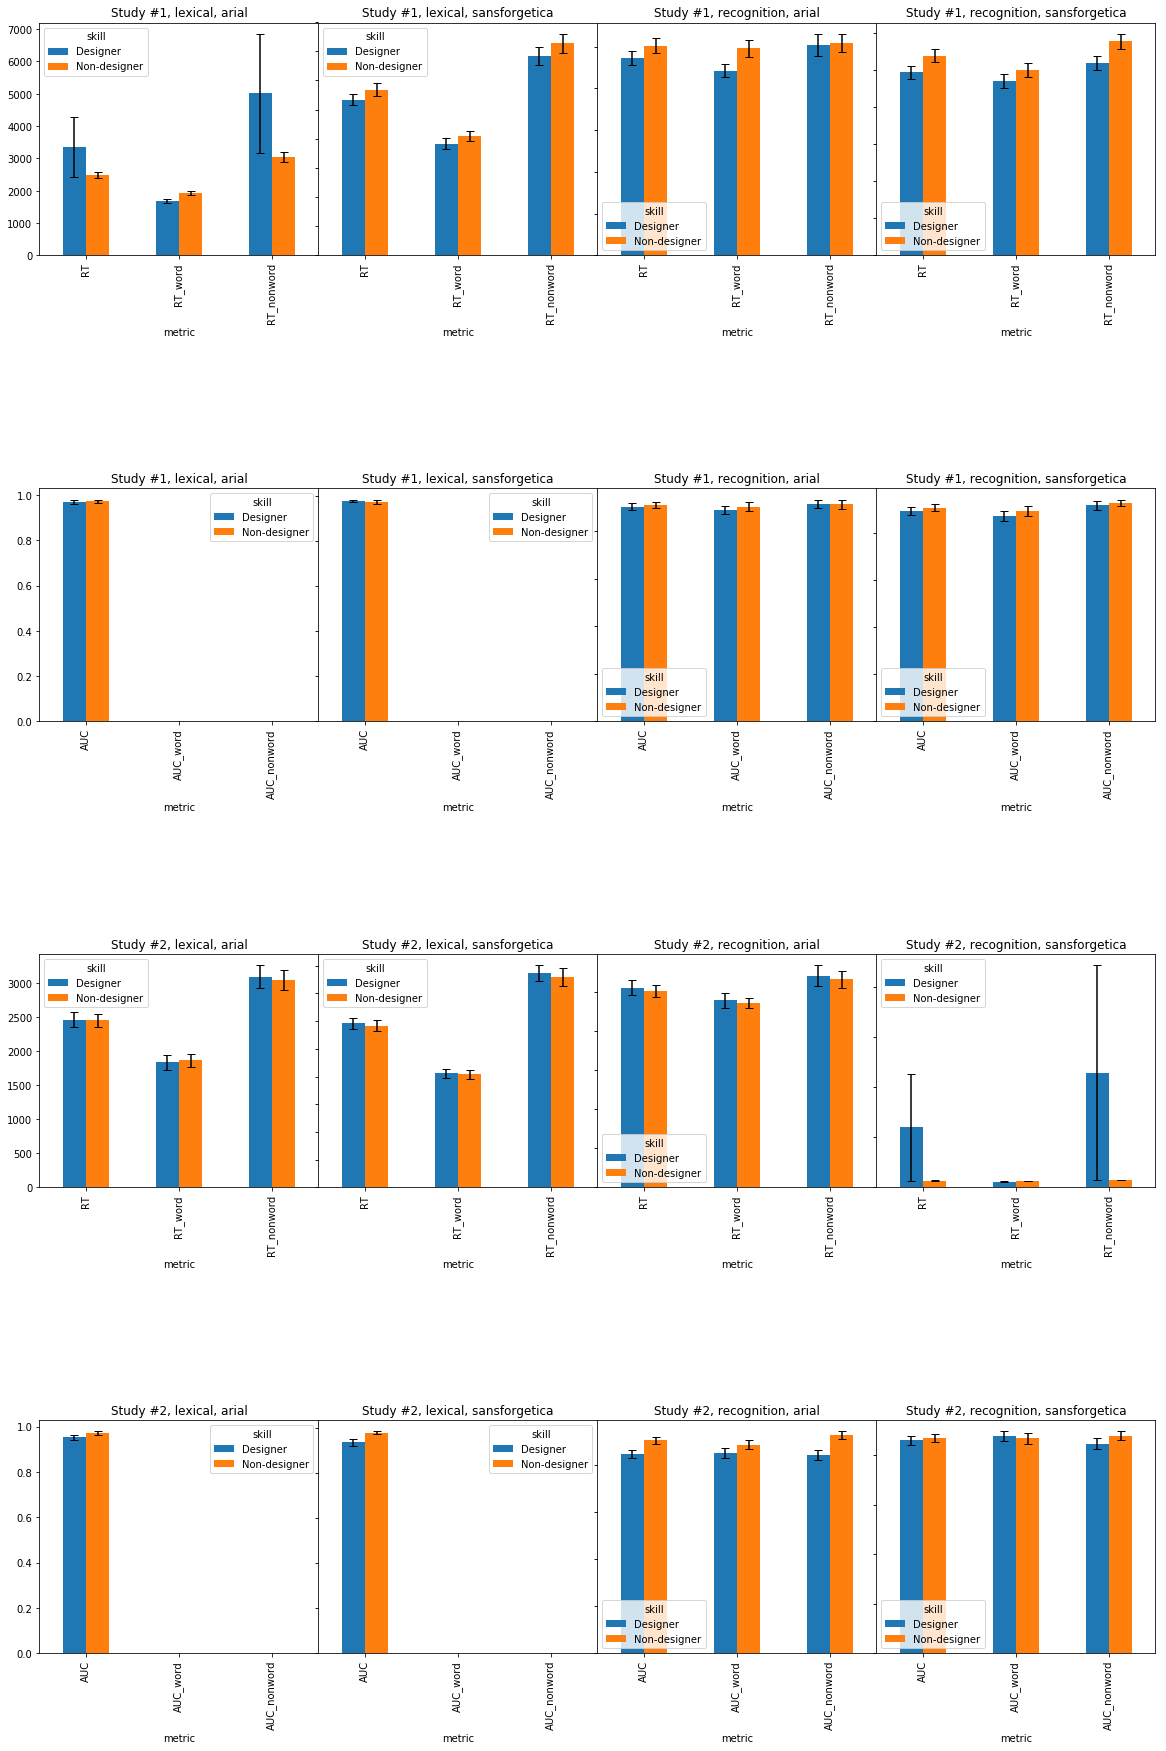

In [4]:
# comparison by design expertise - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

combinations = [(t, f) for t in types for f in fonts]

for sid in [1, 2]:
    for i, (t, font) in enumerate(combinations):
        line = (sid - 1) * 2
        combo = (sid, t, font)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
fig.savefig("results/means-by-design-expertise.pdf")

In [5]:
# comparison by order

cols = pd.MultiIndex.from_product([[1, 2], metrics, ["mean", "SEM"]], names=["order", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types, fonts], names=["sid", "type", "font"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t, font in res.index:
    for order in [1, 2]:
        r = st[(st["Order"] == order) & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t, font), (order, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t, font), (order, metric, "SEM")] = r[metric].sem()
display(res)
res.to_csv("results/means-by-order.csv")

order                                1                                        \
metric                              RT           RT_word          RT_nonword   
stat                              mean      SEM     mean      SEM       mean   
sid type        font                                                           
1   lexical     arial           2974.9  523.352   1790.2  40.9721    4159.59   
                sansforgetica   2743.3  70.8142  1973.58  67.9993    3513.02   
    recognition arial              NaN      NaN      NaN      NaN        NaN   
                sansforgetica      NaN      NaN      NaN      NaN        NaN   
2   lexical     arial          2573.33  108.758  2007.61  125.893    3139.04   
                sansforgetica  3054.77  98.2403  2021.18  64.6621    4088.35   
    recognition arial          2558.49  102.543   2441.6  100.647    2675.38   
                sansforgetica  22834.9  20314.3  2333.21  76.7895    43336.5   

order                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial          1042.76  0.971176  0.00523579       NaN   
                sansforgetica  112.665  0.977765  0.00498211       NaN   
    recognition arial              NaN       NaN         NaN       NaN   
                sansforgetica      NaN       NaN         NaN       NaN   
2   lexical     arial          152.849  0.955417   0.0120429       NaN   
                sansforgetica  153.702  0.961071  0.00867029       NaN   
    recognition arial          136.857  0.866211   0.0142344  0.859375   
                sansforgetica    40633   0.83524   0.0165576  0.837054   

order                                       ...            2           \
metric                                      ...      RT_word            
stat                                 SEM    ...         mean      SEM   
sid type        font                        ...                         
1   lexical     arial                NaN    ...          NaN      NaN   
                sansforgetica        NaN    ...          NaN      NaN   
    recognition arial                NaN    ...      2328.55  63.5053   
                sansforgetica        NaN    ...      2418.49  69.4956   
2   lexical     arial                NaN    ...      1717.93  73.7696   
                sansforgetica        NaN    ...      2076.41  99.3987   
    recognition arial          0.0200858    ...      2328.99  67.5512   
                sansforgetica  0.0198397    ...      2616.57  91.4815   

order                                                                    \
metric                        RT_nonword                AUC               
stat                                mean      SEM      mean         SEM   
sid type        font                                                      
1   lexical     arial                NaN      NaN       NaN         NaN   
                sansforgetica        NaN      NaN       NaN         NaN   
    recognition arial            2528.79  88.1403  0.904504   0.0102984   
                sansforgetica    2722.94  73.6182  0.897243   0.0114621   
2   lexical     arial            3008.73  158.099  0.966964  0.00764543   
                sansforgetica    3531.36  132.106  0.951875   0.0160062   
    recognition arial            2704.19  106.422  0.886021   0.0175652   
                sansforgetica    3093.34  144.838  0.899902   0.0164065   

order                                                                      
metric                         AUC_word            AUC_nonword             
stat                               mean        SEM        mean        SEM  
sid type        font                                                       
1   lexical     arial               NaN        NaN         NaN      

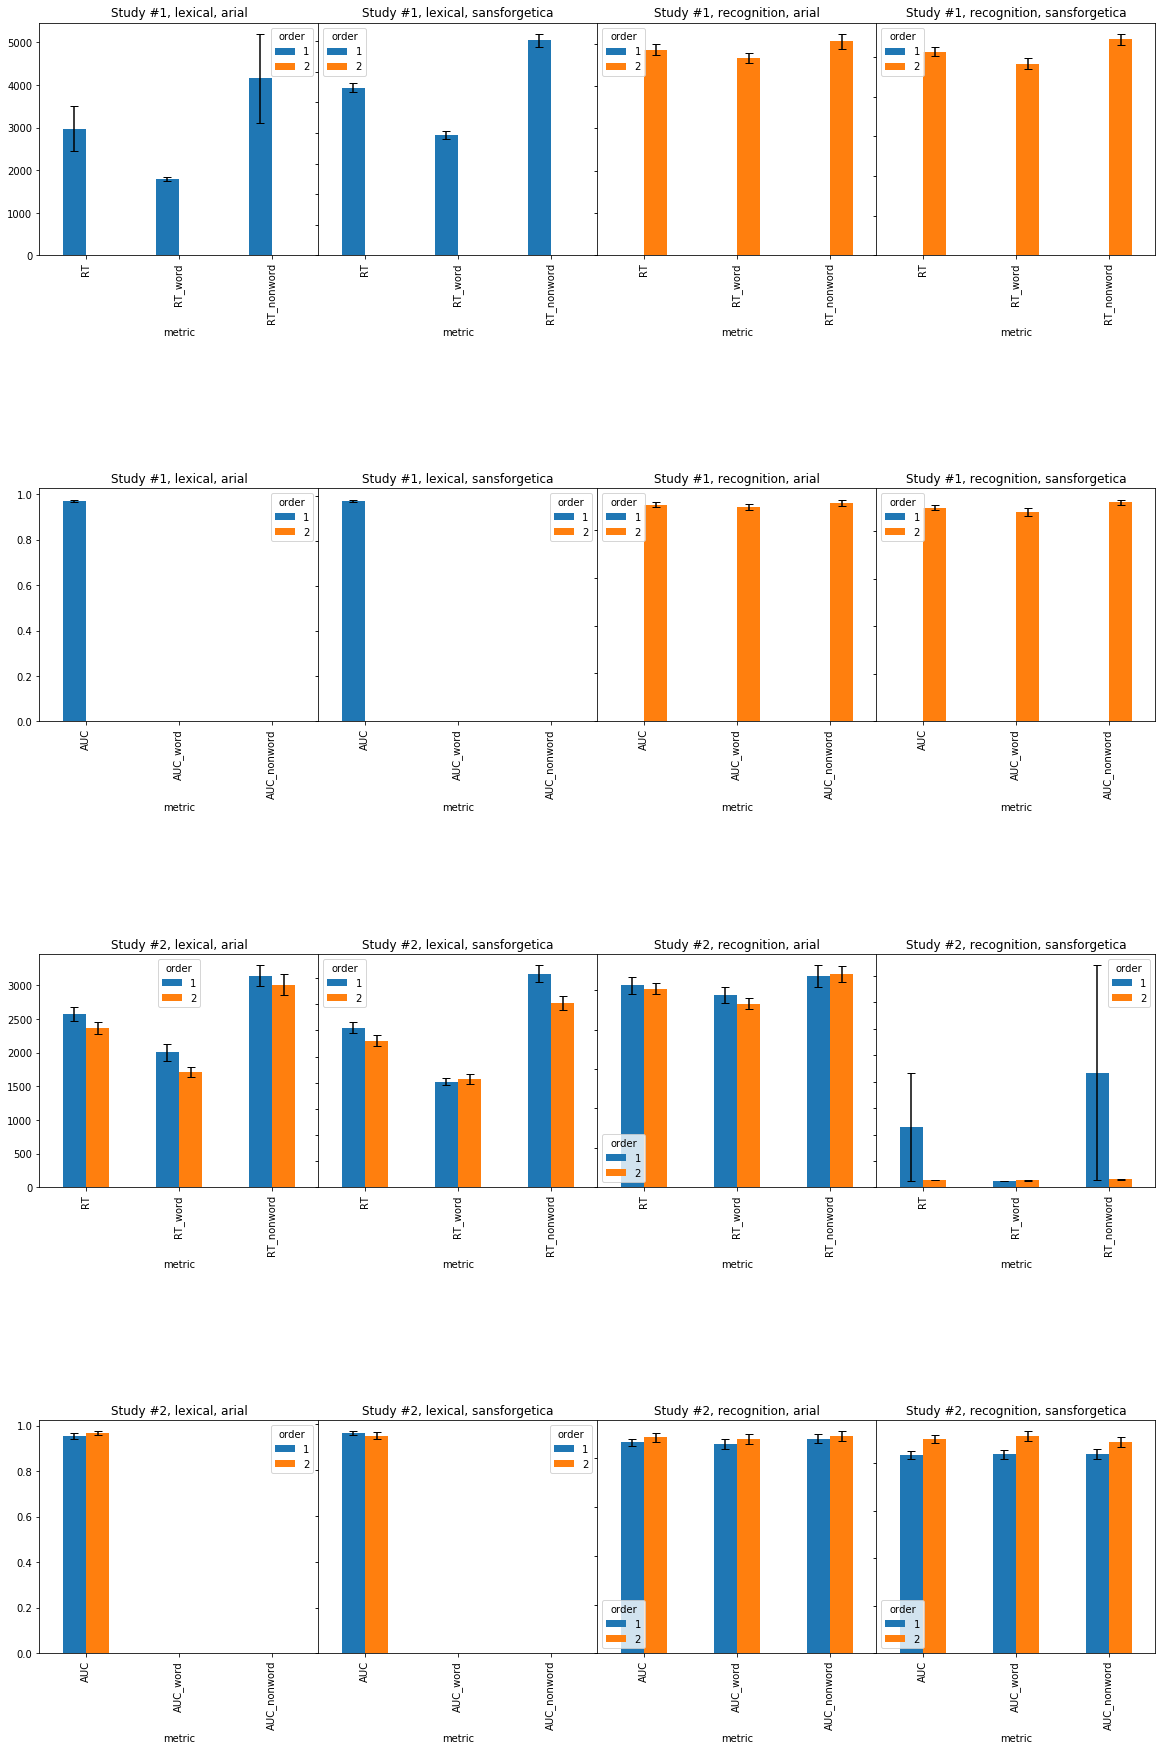

In [6]:
# comparison by order - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

combinations = [(t, f) for t in types for f in fonts]

for sid in [1, 2]:
    for i, (t, font) in enumerate(combinations):
        line = (sid - 1) * 2
        combo = (sid, t, font)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
fig.savefig("results/means-by-order.pdf")

In [7]:
# comparison by order (simpler)

cols = pd.MultiIndex.from_product([[1, 2], metrics, ["mean", "SEM"]], names=["order", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types], names=["sid", "type"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t in res.index:
    for order in [1, 2]:
        r = st[(st["Order"] == order) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t), (order, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t), (order, metric, "SEM")] = r[metric].sem()
display(res)
res.to_csv("results/means-by-order_simpler.csv")

order                  1                                                 \
metric                RT           RT_word          RT_nonword            
stat                mean      SEM     mean      SEM       mean      SEM   
sid type                                                                  
1   lexical       2859.1  263.429  1881.89  40.2005     3836.3  523.451   
    recognition      NaN      NaN      NaN      NaN        NaN      NaN   
2   lexical      2832.56   76.324  2014.92  67.3834    3650.21  117.845   
    recognition  13476.5  10938.4  2383.24  62.1063    24569.8  21879.5   

order                                                          ...      \
metric                AUC              AUC_word                ...       
stat                 mean         SEM      mean        SEM     ...       
sid type                                                       ...       
1   lexical      0.974471  0.00361188       NaN        NaN     ...       
    recognition       NaN         NaN       NaN        NaN     ...       
2   lexical      0.958462  0.00722746       NaN        NaN     ...       
    recognition  0.849534   0.0111272  0.847356  0.0141189     ...       

order                  2                                                     \
metric           RT_word          RT_nonword                AUC               
stat                mean      SEM       mean      SEM      mean         SEM   
sid type                                                                      
1   lexical          NaN      NaN        NaN      NaN       NaN         NaN   
    recognition  2373.52  47.0584    2625.86  57.7351  0.900873  0.00768674   
2   lexical      1883.38  62.8934    3249.95  107.337      0.96  0.00844468   
    recognition  2461.72  57.2198     2883.8  89.6654  0.892428   0.0120775   

order                                                         
metric           AUC_word            AUC_nonword              
stat                 mean        SEM        mean         SEM  
sid type                                                      
1   lexical           NaN        NaN         NaN         NaN  
    recognition  0.886581  0.0100063     0.91636  0.00879799  
2   lexical           NaN        NaN         NaN         NaN  
    recognition  0.894231  0.0142411    0.889123   0.0143595  

[4 rows x 24 columns]

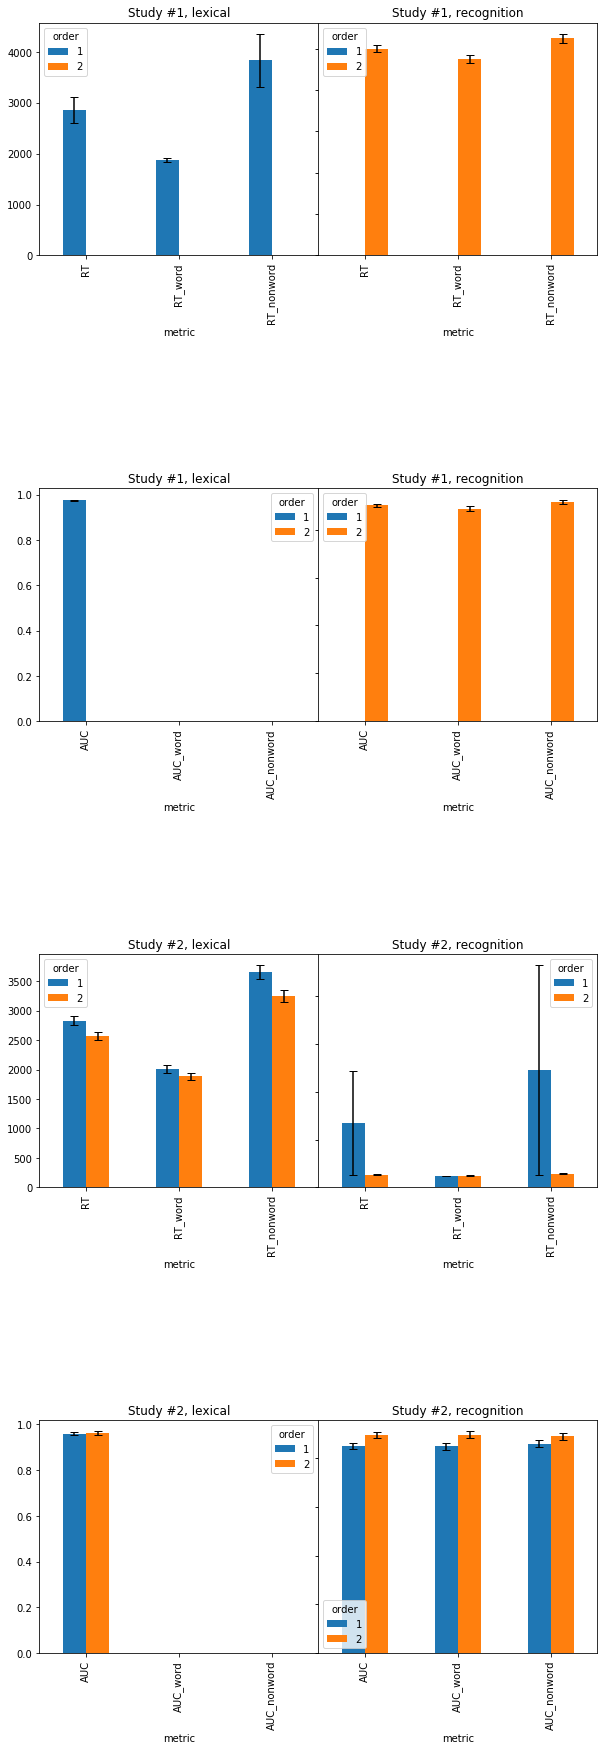

In [9]:
# comparison by order (simpler) - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 2, figsize=(10, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

for sid in [1, 2]:
    for i, t in enumerate(types):
        line = (sid - 1) * 2
        combo = (sid, t)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s" % combo)
fig.savefig("results/means-by-order_simpler.pdf")

In [10]:
# comparison by first font

cols = pd.MultiIndex.from_product([["arial", "sansforgetica"], metrics, ["mean", "SEM"]], names=["first", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types, fonts], names=["sid", "type", "font"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t, font in res.index:
    for first in ["arial", "sansforgetica"]:
        r = st[(st["Firstfont"] == first) & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t, font), (first, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t, font), (first, metric, "SEM")] = r[metric].sem()
display(res)
res.to_csv("results/means-by-first-font.csv")

first                            arial                                        \
metric                              RT           RT_word          RT_nonword   
stat                              mean      SEM     mean      SEM       mean   
sid type        font                                                           
1   lexical     arial          3699.51   1002.1   1832.1  58.3661    5566.93   
                sansforgetica  2881.13  100.117  2076.66   112.47     3685.6   
    recognition arial          2640.38  90.5276  2494.71   94.053    2786.05   
                sansforgetica  2474.38  88.5533  2375.44  100.932    2573.33   
2   lexical     arial          2573.33  108.758  2007.61  125.893    3139.04   
                sansforgetica  2803.89  99.6611  2076.41  99.3987    3531.36   
    recognition arial          2558.49  102.543   2441.6  100.647    2675.38   
                sansforgetica  2854.95  93.9521  2616.57  91.4815    3093.34   

first                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial           1999.7  0.960227  0.00910062       NaN   
                sansforgetica  164.101  0.974091  0.00787097       NaN   
    recognition arial          139.083  0.906783   0.0156876  0.889205   
                sansforgetica   96.289  0.881214   0.0168136  0.865767   
2   lexical     arial          152.849  0.955417   0.0120429       NaN   
                sansforgetica  132.106  0.951875   0.0160062       NaN   
    recognition arial          136.857  0.866211   0.0142344  0.859375   
                sansforgetica  144.838  0.899902   0.0164065  0.914062   

first                                       ...     sansforgetica           \
metric                                      ...           RT_word            
stat                                 SEM    ...              mean      SEM   
sid type        font                        ...                              
1   lexical     arial                NaN    ...           1745.25   57.279   
                sansforgetica        NaN    ...           1862.97  70.3331   
    recognition arial          0.0174938    ...           2150.24    76.27   
                sansforgetica   0.019159    ...            2464.7  95.7649   
2   lexical     arial                NaN    ...           1717.93  73.7696   
                sansforgetica        NaN    ...           2021.18  64.6621   
    recognition arial          0.0200858    ...           2328.99  67.5512   
                sansforgetica   0.019395    ...           2333.21  76.7895   

first                                                                    \
metric                        RT_nonword                AUC               
stat                                mean      SEM      mean         SEM   
sid type        font                                                      
1   lexical     arial            2649.27  102.579  0.982927  0.00413925   
                sansforgetica    3327.82   150.13  0.981707   0.0059868   
    recognition arial             2252.7  88.4571  0.902058    0.013324   
                sansforgetica    2883.49  107.954  0.914444    0.015217   
2   lexical     arial            3008.73  158.099  0.966964  0.00764543   
                sansforgetica    4088.35  153.702  0.961071  0.00867029   
    recognition arial            2704.19  106.422  0.886021   0.0175652   
                sansforgetica    43336.5    40633   0.83524   0.0165576   

first                                                                      
metric                         AUC_word            AUC_nonword             
stat                               mean        SEM        mean        SEM  
sid type        font                                                       
1   lexi

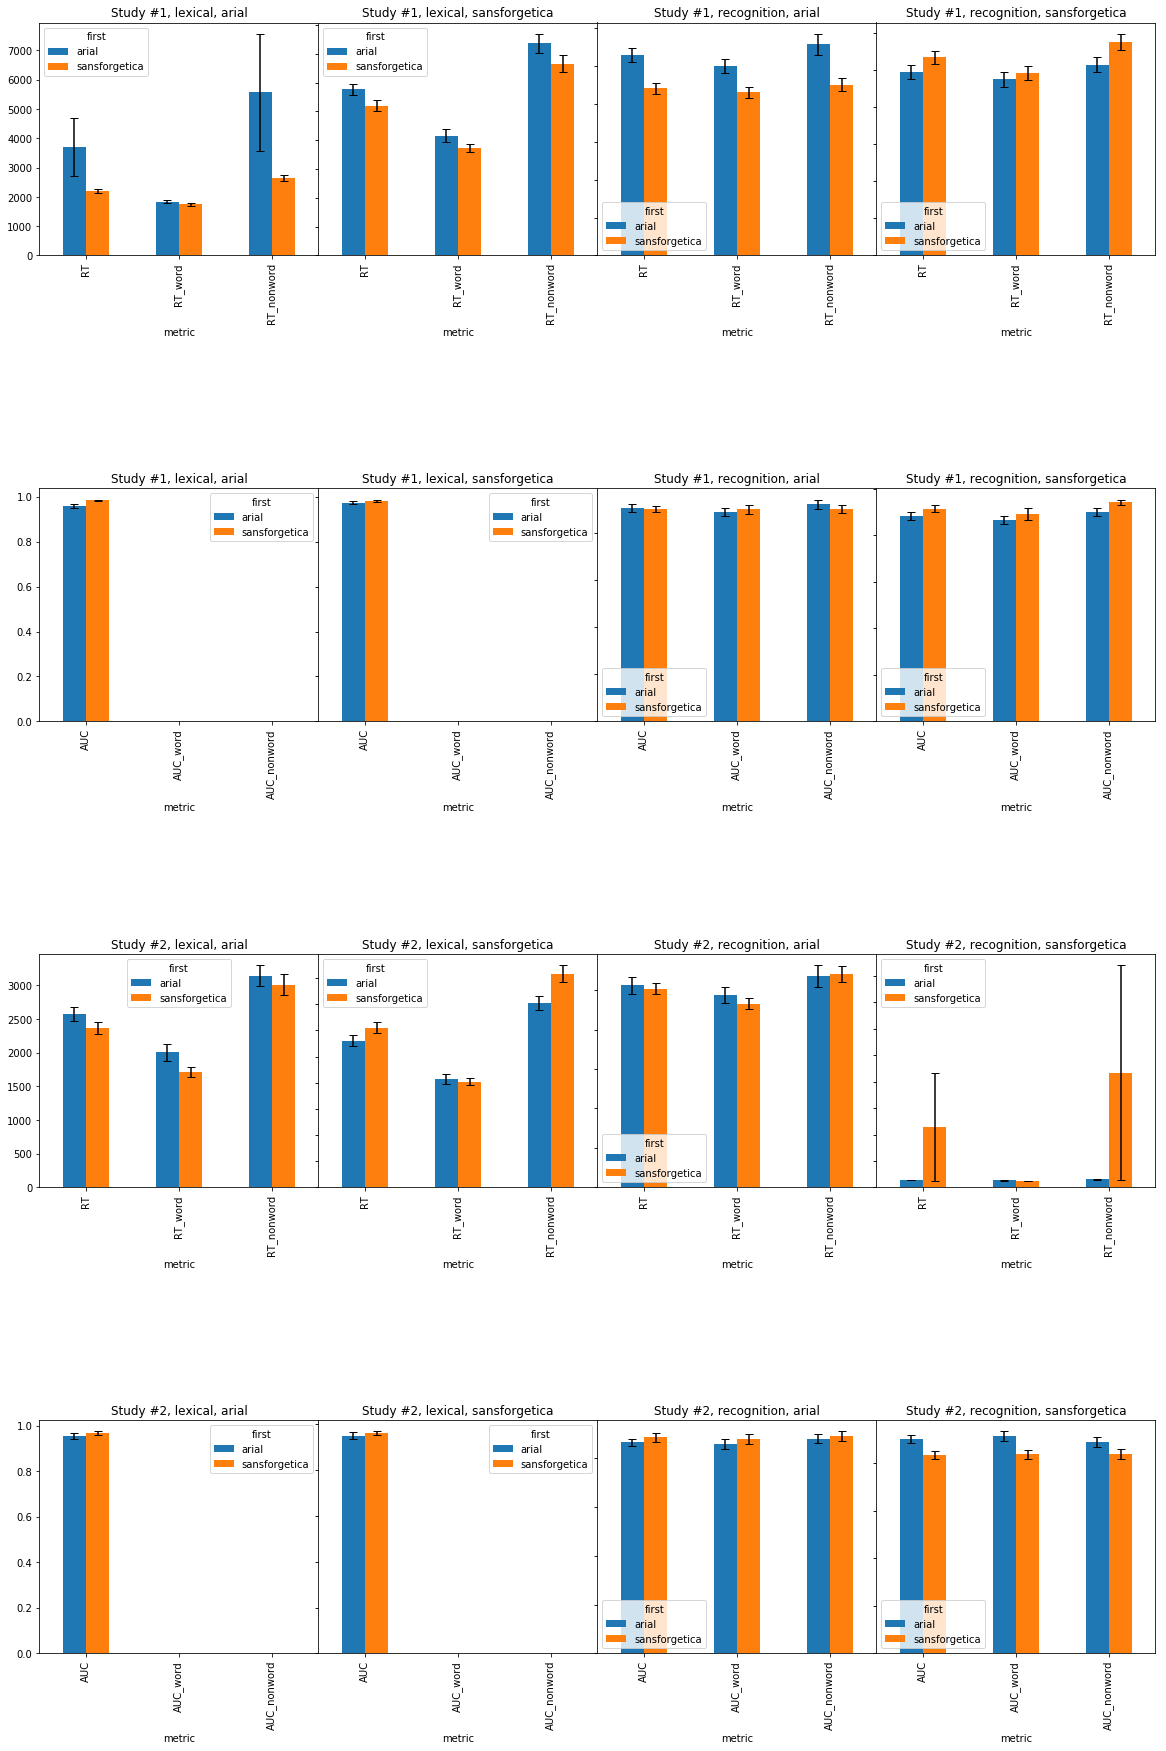

In [11]:
# comparison by first font - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

combinations = [(t, f) for t in types for f in fonts]

for sid in [1, 2]:
    for i, (t, font) in enumerate(combinations):
        line = (sid - 1) * 2
        combo = (sid, t, font)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
fig.savefig("results/means-by-first-font.pdf")

# Training



JoM                                                       \
                  count       mean        std   min   25%   50%   75%    max   
Training                                                                       
Graphic designer   64.0  55.625000  21.466474  17.0  49.0  60.0  70.0  100.0   
Letter designer    84.0  54.666667  22.393702  10.0  34.0  54.5  75.0   90.0   
Non-designer      148.0  52.864865  19.788215   4.0  39.0  50.0  71.0   92.0   
Other designer     24.0  49.166667  22.371695  15.0  29.5  50.0  66.0   79.0   
Typographer        20.0  61.000000  17.222996  41.0  42.0  59.5  79.0   82.0   

                    JoL                                                         
                  count       mean        std   min    25%   50%    75%    max  
Training                                                                        
Graphic designer   64.0  67.187500  31.140682   0.0  50.00  75.0  100.0  100.0  
Letter designer    84.0  55.357143  31.304814   0.0  25.00  50.0   75.0  100.0  
Non-designer      148.0  68.918919  31.083279   0.0  50.00  75.0  100.0  100.0  
Other designer     24.0  62.500000  35.355339   0.0  43.75  50.0  100.0  100.0  
Typographer        20.0  65.000000  32.847334  25.0  25.00  62.5  100.0  100.0


# isDesigner



JoM                                                         \
            count       mean        std   min    25%   50%    75%    max   
isDesigner                                                                 
False       148.0  52.864865  19.788215   4.0  39.00  50.0  71.00   92.0   
True        192.0  54.958333  21.631331  10.0  39.25  59.0  70.25  100.0   

              JoL                                                       
            count       mean        std  min   25%   50%    75%    max  
isDesigner                                                              
False       148.0  68.918919  31.083279  0.0  50.0  75.0  100.0  100.0  
True        192.0  61.197917  32.129848  0.0  25.0  50.0  100.0  100.0


# Font



JoM                                                       \
               count       mean        std   min   25%   50%   75%    max   
Font                                                                        
arial          170.0  55.882353  20.002019   4.0  46.0  50.0  71.0   92.0   
sansforgetica  170.0  52.211765  21.557735  10.0  35.0  50.0  70.0  100.0   

                 JoL                                                         
               count       mean        std   min   25%    50%    75%    max  
Font                                                                         
arial          170.0  89.411765  18.193759  25.0  75.0  100.0  100.0  100.0  
sansforgetica  170.0  39.705882  21.515825   0.0  25.0   50.0   50.0  100.0


# Firstfont



JoM                                                        \
               count       mean        std   min    25%   50%   75%    max   
Firstfont                                                                    
arial          176.0  55.920455  22.688561   4.0  39.75  59.0  75.0  100.0   
sansforgetica  164.0  52.036585  18.524363  14.0  39.00  50.0  69.0   90.0   

                 JoL                                                       
               count       mean        std  min   25%   50%    75%    max  
Firstfont                                                                  
arial          176.0  60.227273  33.729250  0.0  25.0  50.0  100.0  100.0  
sansforgetica  164.0  69.207317  29.122857  0.0  50.0  75.0  100.0  100.0


# Training



JoM                                                       \
                  count       mean        std   min   25%   50%   75%    max   
Training                                                                       
Graphic designer   84.0  49.476190  17.899637  15.0  36.0  50.0  65.0   82.0   
Letter designer    60.0  58.366667  16.681428  15.0  50.0  58.0  72.0   90.0   
Non-designer      204.0  53.333333  20.389959   7.0  38.0  50.0  70.0  100.0   
Other designer     44.0  53.363636  16.583953  19.0  40.0  52.5  60.0   85.0   
Typographer        24.0  52.166667  25.828307   5.0  46.5  50.0  66.0   90.0   

                    JoL                                                         
                  count       mean        std   min   25%   50%     75%    max  
Training                                                                        
Graphic designer   84.0  72.619048  29.457711  25.0  50.0  75.0  100.00  100.0  
Letter designer    60.0  54.166667  31.274708   0.0  25.0  50.0   75.00  100.0  
Non-designer      204.0  69.607843  32.283277   0.0  50.0  75.0  100.00  100.0  
Other designer     44.0  63.636364  33.866421   0.0  25.0  75.0  100.00  100.0  
Typographer        24.0  68.750000  21.174739  50.0  50.0  62.5   81.25  100.0


# isDesigner



JoM                                                        JoL  \
            count       mean        std  min   25%   50%   75%    max  count   
isDesigner                                                                     
False       204.0  53.333333  20.389959  7.0  38.0  50.0  70.0  100.0  204.0   
True        212.0  53.103774  18.596707  5.0  40.0  50.0  65.0   90.0  212.0   

                                                                 
                 mean        std  min   25%   50%    75%    max  
isDesigner                                                       
False       69.607843  32.283277  0.0  50.0  75.0  100.0  100.0  
True        65.094340  30.917879  0.0  25.0  75.0  100.0  100.0


# Font



JoM                                                      \
               count       mean        std  min   25%   50%   75%    max   
Font                                                                       
arial          208.0  53.216346  19.496967  5.0  40.0  50.0  69.0  100.0   
sansforgetica  208.0  53.216346  19.496967  5.0  40.0  50.0  69.0  100.0   

                 JoL                                                       
               count       mean        std  min   25%   50%    75%    max  
Font                                                                       
arial          208.0  67.307692  31.675613  0.0  50.0  75.0  100.0  100.0  
sansforgetica  208.0  67.307692  31.675613  0.0  50.0  75.0  100.0  100.0


# Firstfont



JoM                                                      \
               count       mean        std  min   25%   50%   75%    max   
Firstfont                                                                  
arial          192.0  50.875000  19.830301  7.0  35.0  50.0  68.5   90.0   
sansforgetica  224.0  55.223214  18.977310  5.0  45.0  54.0  69.0  100.0   

                 JoL                                                       
               count       mean        std  min   25%   50%    75%    max  
Firstfont                                                                  
arial          192.0  61.458333  33.338787  0.0  25.0  50.0  100.0  100.0  
sansforgetica  224.0  72.321429  29.257850  0.0  50.0  75.0  100.0  100.0

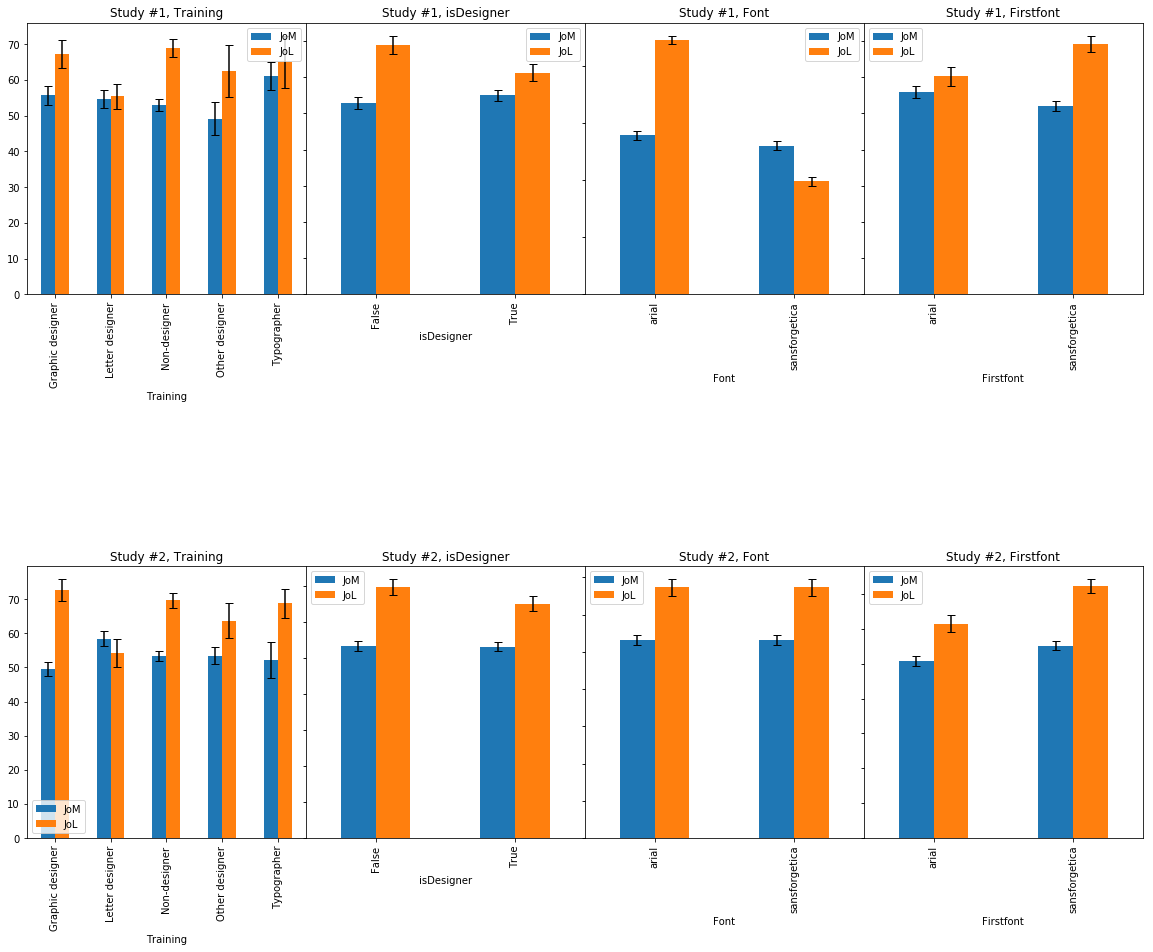

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
plt.subplots_adjust(wspace=0, hspace=1)
for sid in [1, 2]:
    for i, col in enumerate(["Training", "isDesigner", "Font", "Firstfont"]):
        print("#", col)
        print()
        display(st[st["StudyID"] == sid].groupby([col])["JoM", "JoL"].describe())
        print()
        means = st[st["StudyID"] == sid].groupby([col])["JoM", "JoL"].mean()
        errors = st[st["StudyID"] == sid].groupby([col])["JoM", "JoL"].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[sid-1][i],
                       sharey=True,
                       title="Study #%d, %s" % (sid, col))
fig.savefig("results/JoM-JoL.pdf")

